# Parler Data Analysis
---
### Anuneet Anand (2018022)
### CSE648: Privacy and Security in Online Social Media
---  

## Importing Modules

In [1]:
import nltk
import regex as re
import pandas as pd
import wordcloud as wc
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mp

# nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from datetime import datetime

stop = stopwords.words('english')
%matplotlib inline

## Loading Datasets

In [2]:
Posts = pd.read_csv("parler_postsData.csv")
# Posts.head()

In [3]:
Users = pd.read_csv("parler_userData.csv")
# Users.head()

---
## User Activity
---

### Initial Setup

In [4]:
Types = ['Not Human, Not Verified','Not Human, Verified','Human, Not Verified','Human, Verified']
Colors = ['tomato','khaki','skyblue','palegreen']
Legend = [mp.Patch(color=Colors[i], label=Types[i]) for i in range(4)]

---
### Top 10 Usernames Who Generated Maximum Content on Parler

Content generation is measured as the percentage of posts contributed by a user.

In [5]:
# Calculating individual % of content generation and selecting top 10 users

C = Counter(Posts['Creator'])
D = [(C[i]*100/len(Posts),i) for i in C]
D.sort(reverse=True, key=lambda x:x[0])
D = D[:10]

df = pd.DataFrame()
df['Username']=[list(Users[Users['Id'].str.contains(i[1])]['Username'])[0] for i in D]
df['Content']=[i[0] for i in D]
df['Human'] = [list(Users[Users['Id'].str.contains(i[1])]['Human'])[0] for i in D]
df['Verified'] = [list(Users[Users['Id'].str.contains(i[1])]['Verified'])[0] for i in D]

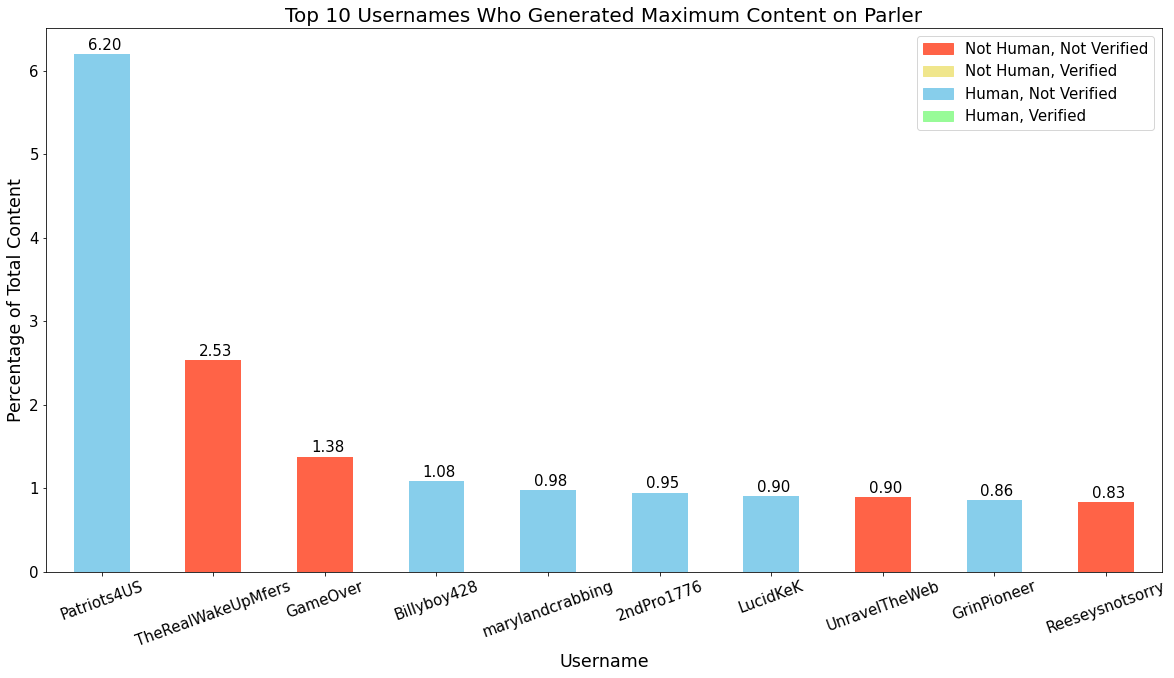

In [6]:
# Barplot for showcasing content generation by the top 10 users

colormap = [Colors[2*int(df['Human'][i])+int(df['Verified'][i])] for i in df.index]
fig = df.plot(kind='bar',x='Username',y='Content',rot=20,fontsize=15,color=colormap,figsize=(20,10))

plt.title('Top 10 Usernames Who Generated Maximum Content on Parler', {'fontsize':20})
plt.xlabel('Username', {'fontsize':17.5})
plt.ylabel('Percentage of Total Content', {'fontsize':17.5})

for p in fig.patches:
    plt.text(p.get_x()+p.get_width()/4,p.get_height()+0.05,"{0:.2f}".format(p.get_height()), {'fontsize':15})

plt.legend(handles=Legend, prop={'size':15})
plt.show()

In [7]:
# Amount of content generated by top 10 users

s = df['Content'].sum().round(3)
print(str(s)+" % of the total content is generated by the top 10 users cumulatively.")

16.606 % of the total content is generated by the top 10 users cumulatively.


---
### Top 10 Usernames With Maximum  Upvotes on Parler

The score attribute in the Users dataset represent the number of upvotes a user has received. Hence we select the top 10 users with maximum scores.

In [8]:
# Selecting top 10 users with maximum upvotes

df = Users.sort_values('Score',ascending=False)[['Username','Score','Human','Verified']][:10]
df.reset_index(inplace=True,drop=True)

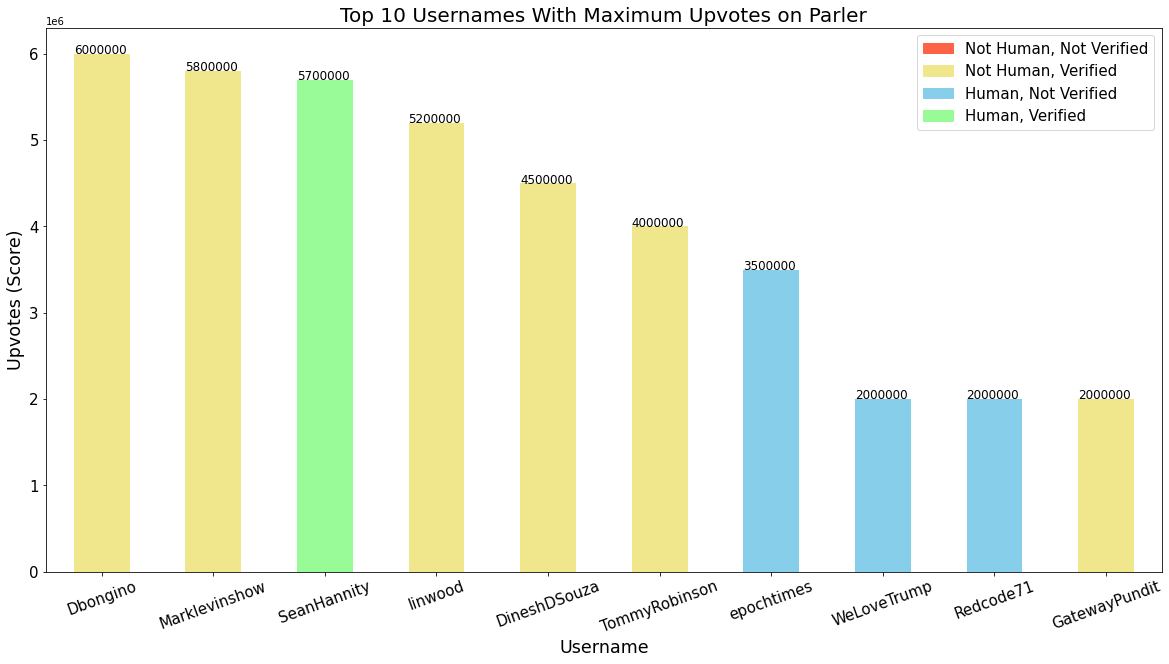

In [9]:
# Barplot for showcasing upvotes of the top 10 users

colormap = [Colors[2*int(df['Human'][i])+int(df['Verified'][i])] for i in df.index]
fig = df.plot(kind='bar',x='Username',y='Score',rot=20,fontsize=15,color=colormap,figsize=(20,10))

plt.title('Top 10 Usernames With Maximum Upvotes on Parler', {'fontsize':20})
plt.xlabel('Username', {'fontsize':17.5})
plt.ylabel('Upvotes (Score)', {'fontsize':17.5})

for p in fig.patches:
    plt.text(p.get_x(),p.get_height()+0.05,p.get_height(), {'fontsize':12})

plt.legend(handles=Legend, prop={'size':15})
plt.show()

---
### Top 10 Usernames With Maximum Interactions on Parler

The iteractions attribute in the Users dataset is used for comparison.

In [10]:
# Selecting top 10 users based on Interactions

df= Users.sort_values('Interactions',ascending=False)[['Username','Interactions','Human','Verified','Bio']][:10]
df.reset_index(inplace=True,drop=True)

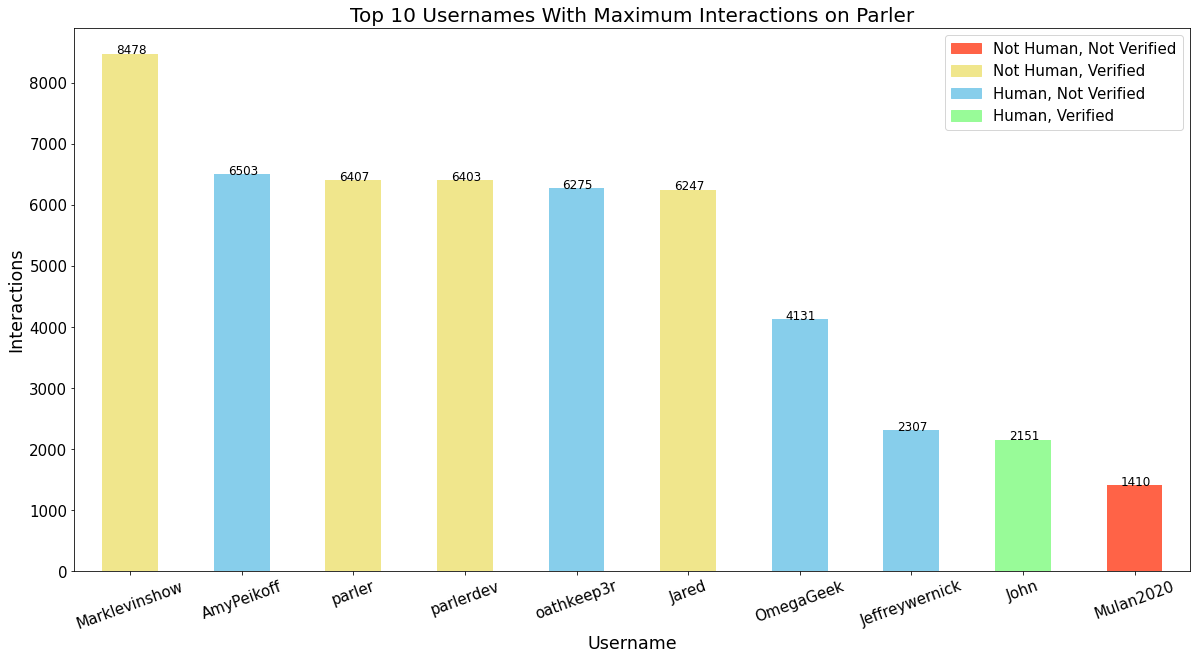

In [11]:
# Barplot for showcasing the interactions of top 10 users

colormap = [Colors[2*int(df['Human'][i])+int(df['Verified'][i])] for i in df.index]
fig = df.plot(kind='bar',x='Username',y='Interactions',rot=20,fontsize=15,color=colormap,figsize=(20,10))

plt.title('Top 10 Usernames With Maximum Interactions on Parler', {'fontsize':20})
plt.xlabel('Username', {'fontsize':17.5})
plt.ylabel('Interactions', {'fontsize':17.5})

for p in fig.patches:
    plt.text(p.get_x()+p.get_width()/4,p.get_height()+0.05,p.get_height(), {'fontsize':12})

plt.legend(handles=Legend, prop={'size':15})
plt.show()

---
### Word Cloud from Bios of Users

The text in the bios of the 10 users with most iteractions are used. The text is preprocessed to remove any hashtags, mentions, punctuation, stopwords and links.

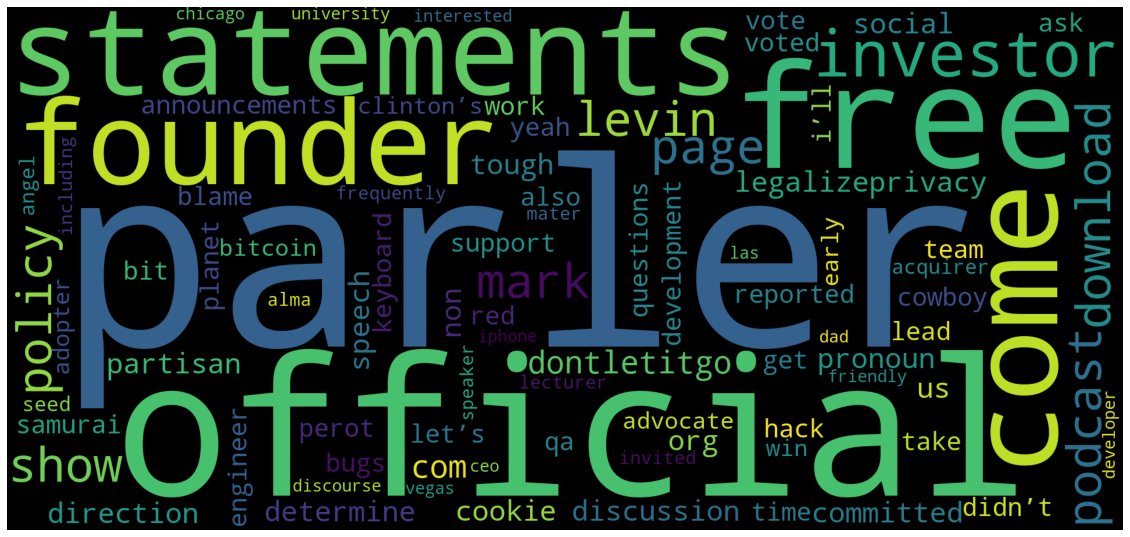

In [12]:
# Cleaning text and plotting word cloud

text = ""
TextList = list(df['Bio'].dropna())

for x in TextList:
    s = str(x)
    s = s.lower()
    s = s.replace("\\n"," ")
    s = re.sub("#\S+"," ", s)
    s = re.sub("@\S+"," ", s)
    s = re.sub("([^\'’A-Za-z \t])|(\w+:\/\/\S+)"," ", s)
    text+=s+" "

text = re.sub('\s{2,}', " ", text)
text = list(text.split())
Words = []
for i in text:
    if i not in stop : Words.append(i)

Data = Counter(Words)
cloud = wc.WordCloud(width = 1920, height = 900,  background_color ='black', stopwords = wc.STOPWORDS, random_state=125)
cloud.generate_from_frequencies(Data)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)

---
### Top 10 Usernames With Most Number of Mentions on Parler

The user mentions were retrieved from the 'At' column in the posts dataset.

In [13]:
# Selecting top 10 users based on number of mentions

Z = []
for i in Posts[Posts['At']!='{}']['At']:
    for j in list(eval(i).values()): Z.append(j)

C = Counter(Z)
D = [(C[i],i) for i in C]
D.sort(reverse=True,key=lambda x:x[0])
D = D[:10]

df = pd.DataFrame()
df['Username']=[list(Users[Users['Id'].str.contains(i[1])]['Username'])[0] for i in D]
df['Mentions']=[i[0] for i in D]
df['Human'] = [list(Users[Users['Id'].str.contains(i[1])]['Human'])[0] for i in D]
df['Verified'] = [list(Users[Users['Id'].str.contains(i[1])]['Verified'])[0] for i in D]

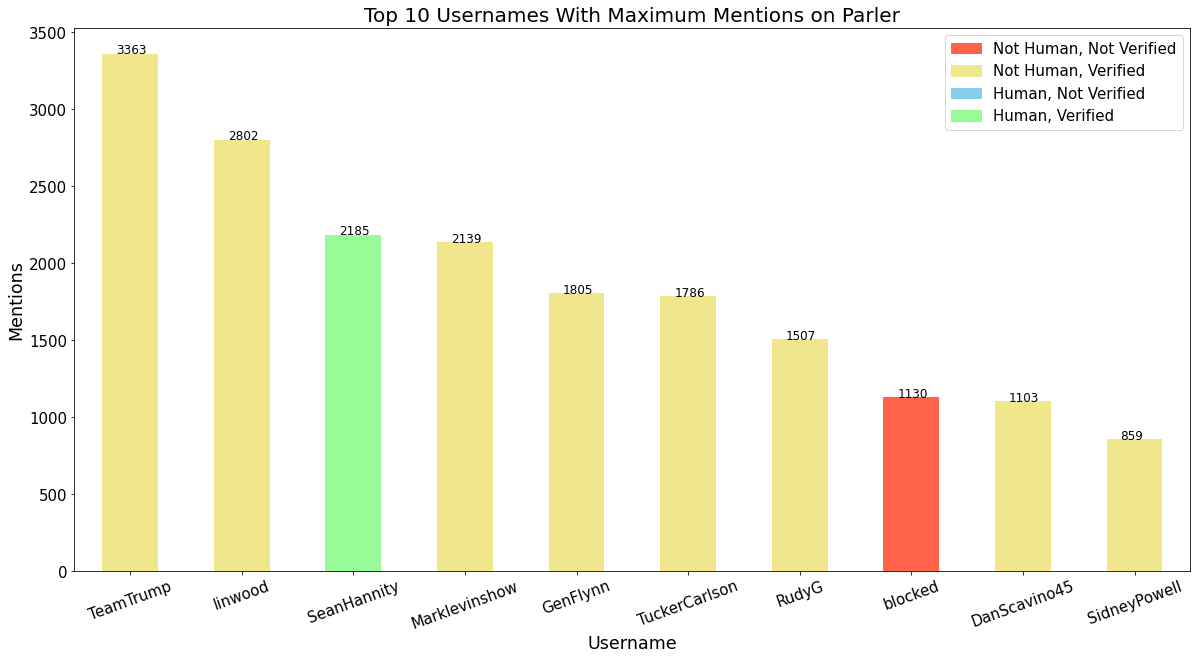

In [14]:
# Barplot for showcasing the top 10 users with maximum number of mentions

colormap = [Colors[2*int(df['Human'][i])+int(df['Verified'][i])] for i in df.index]
fig = df.plot(kind='bar',x='Username',y='Mentions',rot=20,fontsize=15,color=colormap,figsize=(20,10))

plt.title('Top 10 Usernames With Maximum Mentions on Parler', {'fontsize':20})
plt.xlabel('Username', {'fontsize':17.5})
plt.ylabel('Mentions', {'fontsize':17.5})

for p in fig.patches:
    plt.text(p.get_x()+p.get_width()/4,p.get_height()+0.05,p.get_height(), {'fontsize':12})

plt.legend(handles=Legend, prop={'size':15})
plt.show()

---
## Words & Hashtags in Posts
---

### Initial Setup

The text in the posts is preprocessed and the words and hashtags are separated. Mentions, links, punctuation, etc. are removed and the text is normalised. The length of post is measured as number of words in it. For creating the wordcloud, the stopwords are removed.

In [15]:
# Cleaning & Extracting

Text = list(Posts['Body'].dropna())
Words = []
HashTags = []
Post_Length = {}

for x in Text:

    s = str(x)
    s = s.replace("\\n"," ")
    s = re.sub("@\S+"," ", s)
    s = re.sub('\s{2,}'," ", s)

    w = ""
    h = ""

    for i in s.split():
        if "#" in i:
            h += i.lower() + " "
        else : 
            w += i.lower() + " "
    
    h = re.sub(r'[^\P{P}\#]+',' ',h)
    h = list(re.sub('\s{2,}'," ",h).split())
    w = re.sub("([^\'’A-Za-z \t])|(\w+:\/\/\S+)"," ", w)
    w = list(re.sub('\s{2,}'," ",w).split())
    
    for x in h:
        if x in Post_Length:
            Post_Length[x].append(len(w))
        else:
            Post_Length[x] = [len(w)]
        HashTags.append(x)
    
    for x in w: 
        if x not in stop and len(x)>1: 
            Words.append(x)
            
for x in Post_Length:
    Post_Length[x]=sum(Post_Length[x])/len(Post_Length[x])

---
### Word Cloud from Posts on Parler

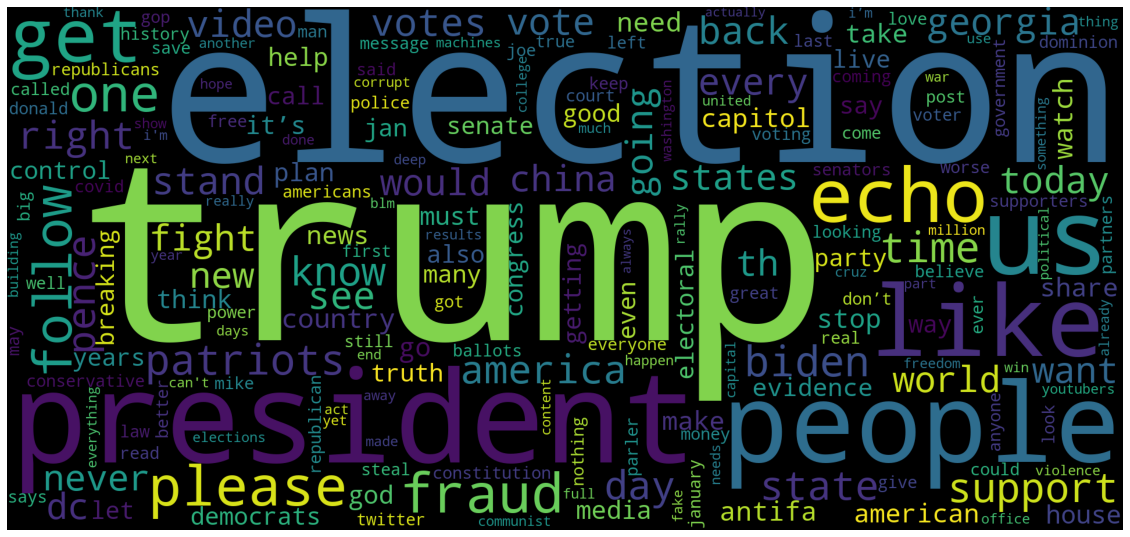

In [16]:
# Creating wordcloud

Data = Counter(Words)
cloud = wc.WordCloud(width = 1920, height = 900,  background_color ='black', stopwords = wc.STOPWORDS,collocations=False, random_state=10)
cloud.generate_from_frequencies(Data)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)

---
### Top 10 Words in Parler Posts

In [17]:
# Plotting top 10 words in parler posts

C = Counter(Words)
D = [(C[i],i) for i in C]
D.sort(reverse=True,key=lambda x:x[0])
D = D[:10]

df = pd.DataFrame()
df['Word']=[i[1] for i in D]
df['No. of Occurences']=[i[0] for i in D]

fig = px.bar(df,x='Word',y='No. of Occurences',title="Top 10 Words in Parler Posts",text='No. of Occurences')
fig.show()

---
### Top 10 HashTags in Parler Posts Based on Number Of Occurrences

In [18]:
# Plotting top 10 hashtags in parler posts based on occurrences

C = Counter(HashTags)
D = [(C[i],i) for i in C]
D.sort(reverse=True,key=lambda x:x[0])
D = D[:10]

df = pd.DataFrame()
df['HashTags']=[i[1] for i in D]
df['No. of Occurences']=[i[0] for i in D]

fig = px.bar(df,x='HashTags',y='No. of Occurences',title="Top 10 HashTags in Parler Posts Based on Number Of Occurrences",text='No. of Occurences')
fig.show()

---
### Top 10 HashTags in Parler Posts Based on Average Post Length

In [19]:
# Plotting top 10 hashtags in parler posts based on average post length

C = Post_Length
D = [(C[i],i) for i in C]
D.sort(reverse=True,key=lambda x:x[0])
D = D[:10]

df = pd.DataFrame()
df['HashTags']=[i[1] for i in D]
df['Average Post Length']=[i[0] for i in D]

fig = px.bar(df,x='HashTags',y='Average Post Length',title="Top 10 HashTags in Parler Posts Based on Average Post Length",text='Average Post Length')
fig.show()

---
## Time Series Plots
---

### Initial Setup

The lowest granularity is kept as hourly. It can be modified by changing **s**

In [20]:
Buttons = []
Buttons.append(dict(count=1, label="YTD", step="year", stepmode="todate"))
Buttons.append(dict(count=1, label="Day", step="day", stepmode="backward"))
Buttons.append(dict(count=7, label="Week", step="day", stepmode="backward"))
Buttons.append(dict(count=1, label="Month", step="month", stepmode="backward"))
Buttons.append(dict(count=1, label="Year", step="year", stepmode="backward"))
Buttons.append(dict(label="Complete", step="all"))

### Content Generation on Parler

In [21]:
# Resampling Time Series Data

s = 'H'
df = pd.DataFrame()
C = Counter([datetime.strptime(str(i), '%Y%m%d%H%M%S') for i in Posts['CreatedAt']])
df['Time']=[i for i in C]
df['Posts']=[C[i] for i in C]
df = df.sort_values('Time')
df = df.resample(s, on='Time').Posts.sum()

In [22]:
# Time Series plot of content generation

fig = px.line(df, title='Content Generation On Parler')
fig.update_xaxes(rangeslider_visible=True, rangeselector = dict(buttons=Buttons))
fig.show()

---
### User Account Creation on Parler

In [23]:
# Resampling Time Series Data

s = 'H'
df = pd.DataFrame()
C = Counter([datetime.strptime(str(i), '%Y%m%d%H%M%S') for i in Users['Joined']])
df['Time']=[i for i in C]
df['No. of Users Joined']=[C[i] for i in C]
df = df.sort_values('Time')
df = df.resample(s, on='Time')['No. of Users Joined'].sum()

In [24]:
# Time Series plot of user account creation

fig = px.line(df,title='User Account Creation On Parler')
fig.update_xaxes(rangeslider_visible=True,rangeselector = dict(buttons=Buttons))
fig.show()

---
## Some Overall Statistics
---

In [25]:
print("Data available for "+str(len(Posts))+" posts made by "+str(Posts['Creator'].nunique())+ " users.")
print("User information available for "+str(len(Users))+" users.")
print(str(sum(list(Users['Human'])))+" users are Human.")
print(str(sum(list(Users['Verified'])))+" users are Verified.")
print("Mean Interaction of Users :",str(round(Users['Interactions'].mean(),2)))
print("Mean Score of Users :",str(round(Users['Score'].mean(),2)))
print("No. of Unique Hashtags :",len(HashTags))

Data available for 101945 posts made by 13442 users.
User information available for 22326 users.
7883 users are Human.
370 users are Verified.
Mean Interaction of Users : 241.97
Mean Score of Users : 8562.85
No. of Unique Hashtags : 3215535


## End Of Notebook